# Basic Model Dengue Vaccination

## Description of the model

- 5 age groups: infants, children, adolescents, adults and the elderly
- born infants, died as elderly (only birth in the first group, only death as the elderly), other mortality is negligible
- considering that mortality from dengue is negligible
- considering high and no transmission seasons
- high season of 3 months, the rest is low or no transmission
- considering random introductions throughout the years, random initial 'spark'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
np.random.seed(123)

## Attempt 1: no transmission

- Checking how the population behaves under our parametrization 
- No transmission, just the populational model

In [2]:
def n_groups_model(y, t, N, pop, beta, gamma, mu_vec, l_vec):
    # N is number of age groups 
    S = y[0:N]
    I = y[N:2*N]
    R = y[2*N:3*N]
    IT = sum(I) #total infected
    S = np.append(S,0)
    I = np.append(I,0)
    R = np.append(R,0)
    S = np.append(0,S)
    I = np.append(0,I)
    R = np.append(0,R)
    l_vec_2 = np.append(0,l_vec)
    l_vec_2 = l_vec_2[:-1]
    dSdt = -beta*S[1:-1]*IT - mu_vec*S[1:-1] - l_vec*S[1:-1] + l_vec_2*S[:-2]
    dIdt =  beta*S[1:-1]*IT - gamma*I[1:-1] - mu_vec*I[1:-1] - l_vec*I[1:-1] + l_vec_2*I[:-2]
    dRdt =  gamma*I[1:-1] - mu_vec*R[1:-1] - l_vec*R[1:-1] + l_vec_2*R[:-2]
    dSdt[0] = dSdt[0] + nu
    return np.array([dSdt, dIdt, dRdt]).flatten()

In [3]:
N = 5
pop = 12000000
y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

beta = 0
gamma = 1/(7.0)

nu = 100000/365 # 100k nascimentos por dia
l1 = nu/alpha1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365, 365)

y0 = alpha1,alpha2,alpha3,alpha4,alpha5,0,0,0,0,0,0,0,0,0,0

ret = odeint(n_groups_model, y0, t_total, args=(N, pop, beta, gamma, mu_vec, l_vec))

0.06666666666666665 0.06666666666666667


In [4]:
ret

array([[0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ]])

In [5]:
ret[:,0:5].sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

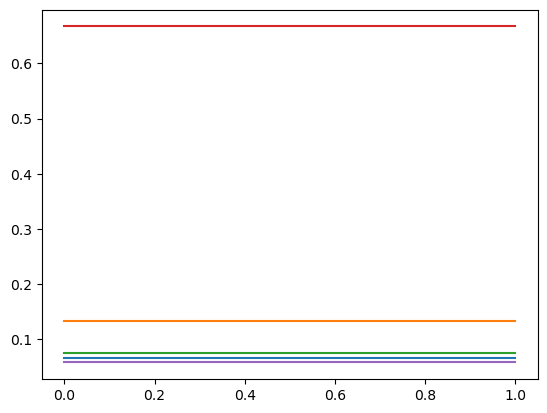

In [6]:
plt.plot(t_total/365,ret[:,0:5])

## Attempt 2: no seasonal transmission

- No seasonal transmission, constant beta
- Initial condition in adults

In [7]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta = 2*gamma
print(beta/gamma)


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365*10, 10000)

y0 = alpha1,alpha2,alpha3,(8000000-10)/pop,alpha5,0,0,0,10/pop,0,0,0,0,0,0

ret = odeint(n_groups_model, y0, t_total, args=(N, pop, beta, gamma, mu_vec, l_vec))

2.0
0.06666666666666667 0.06666666666666667


In [8]:
l_vec

array([5.47945205e-04, 2.73972603e-04, 4.87062405e-04, 5.47945205e-05,
       0.00000000e+00])

In [9]:
1/l_vec[:-1]/365

array([ 5.   , 10.   ,  5.625, 50.   ])

In [10]:
y0

(0.06666666666666667,
 0.13333333333333333,
 0.075,
 0.6666658333333333,
 0.058333333333333334,
 0,
 0,
 0,
 8.333333333333333e-07,
 0,
 0,
 0,
 0,
 0,
 0)

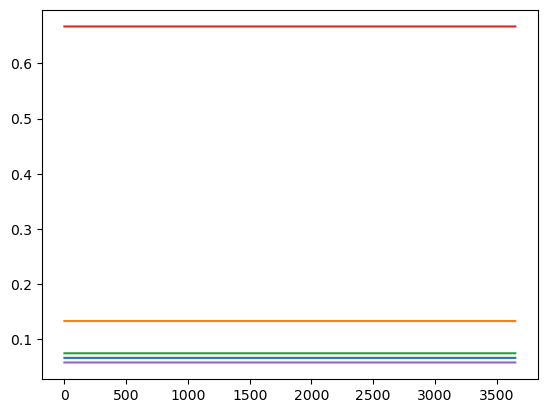

In [11]:
plt.plot(t_total,ret[:,0:5]+ret[:,5:10]+ret[:,10:])

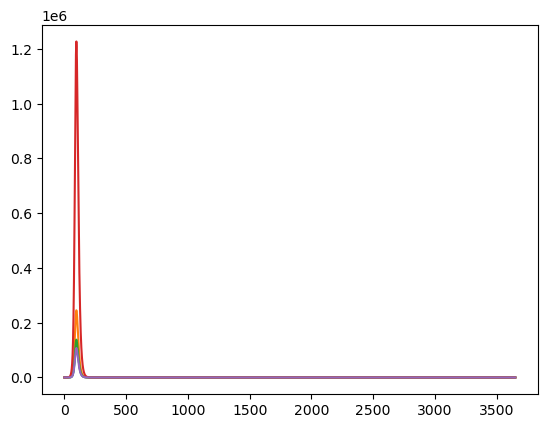

In [12]:
plt.plot(t_total,ret[:,5:10]*pop)